# Quantum Computing Introduction - Assignment 7
# Names: Lilith Bertens, Quincy Koelman
# IDs: BERTENL, KOELMAQ (500878956)

Welcome to the fourth assignment! During this assignment, you will use the IBM Qiskit package. This framework offers a huge variety of very interesting functionalities to explore. This assignment will require you to investigate about the proper usage of the tool. Please refer to the [IBM Quantum Documentation](https://qiskit.org/documentation/).

For this assignment you can use whatever simulator you consider useful to solve the exercises. Read carefully the questions and identify the most suitable simulator for your purposes. Moreover, you will have to setup your own [QuantumCircuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) because we are not going to use only 2-qubit quantum system. Hence, your solution should include the complete setup process to create and simulate the requested quantum circuit.

## Question 1

During the lecture: "Basic Quantum Algorithms 1", the implementation of a quantum half-adder was presented. Implement the corresponding circuit, execute the simulation and explain why your implementation performs the correct sum.

![Question1](img/qci_a7_question1.png)

In [213]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(4)
QQ.h(0)
QQ.h(1)
QQ.cx(0,2)
QQ.cx(1,2)
QQ.ccx(0,1,3)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()


Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j],
            dims=(2, 2, 2, 2))
     ┌───┐               
q_0: ┤ H ├──■─────────■──
     ├───┤  │         │  
q_1: ┤ H ├──┼────■────■──
     └───┘┌─┴─┐┌─┴─┐  │  
q_2: ─────┤ X ├┤ X ├──┼──
          └───┘└───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘


So yes, this does indicate an adder, a half adder because a carry in was not accounted for. 
as when q0 and q1 are 0 it gives 0 in q3 and q2, when either of the first 2 is one and the other is zero it gives back 1, and when both are 1 it gives out 2.

## Question 2

During the lecture: "Basic Quantum Algorithms 1", it was presented the `Deutsch algorithm` with its corresponding quantum implementation. Moreover, you identified 2 possible oracle implementations for balanced (Identity and NOT) and constant (Set and Reset) functions.

Implement the following circuit (representing the Set function) and execute a single-shot simulation. Does your implementation correctly identify the function as constant?

![Question2](img/qci_a7_question2.png)

NB: Remember that the algorithm states that the $\ket{q_{1}}$ register must be initialized to $\ket{1}$.

Statevector([-0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
     ┌──────────────────────┐┌───┐┌───┐
q_0: ┤0                     ├┤ H ├┤ H ├
     │  Initialize(0,0,1,0) │├───┤├───┤
q_1: ┤1                     ├┤ H ├┤ X ├
     └──────────────────────┘└───┘└───┘
[['00'], [1]]


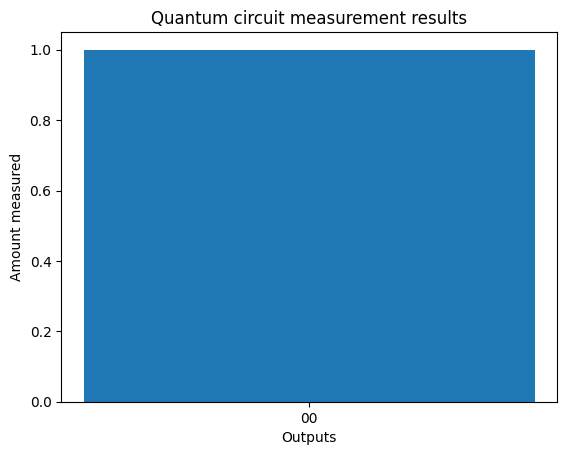

In [ ]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(2)
QQ.initialize([0,0,1,0])
QQ.h(0)
QQ.h(1)
QQ.x(1)
QQ.h(0)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 1)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()


Yes it does identify it as constant, as the first register, q0, is equal to 0, meaning that it is constant and y is independant of x, meaning that it is DEFINATLY constant.

## Question 3

Your previous answer was based on a single-shot simulation, you could have had luck. What about a multi-shot one? Add a measurement to register $\left| q_{0} \right\rangle$, execute a multi-shot simulation and plot the resulting histogram. Did you get $\left| 0 \right\rangle$ with 100% probability?


Statevector([-0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
     ┌──────────────────────┐┌───┐┌───┐
q_0: ┤0                     ├┤ H ├┤ H ├
     │  Initialize(0,0,1,0) │├───┤├───┤
q_1: ┤1                     ├┤ H ├┤ X ├
     └──────────────────────┘└───┘└───┘
[['10', '00'], [25002, 24998]]


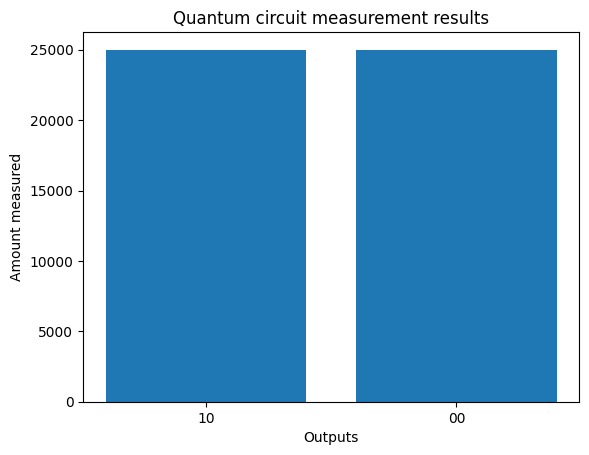

In [ ]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(2)
QQ.initialize([0,0,1,0])
QQ.h(0)
QQ.h(1)
QQ.x(1)
QQ.h(0)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()


Yep, we get 0 with a 100% probability for q0, y is still independant of x so it will stay constant. it might look weird, non constant, but it is just because y has a 50-50 chance to be one or zero. meaning that the y output is that chance, and shouldn't really be judged by being measured.

## Question 4

As mentioned in the previous question (`Question 3`), during the lecture: "Basic Quantum Algorithms 1" there were also introduced 2 possible oracle implementations for balanced functions. Choose one of them, implement the corresponding circuit, execute a multi-shot simulation and plot the resulting histogram. Did you get $\ket{1}$ with 100% probability?

NB: Remember that the algorithm states that the $\ket{q_{1}}$ register must be initialized to $\ket{1}$.

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.        +0.j,
              0.70710678+0.j],
            dims=(2, 2))
     ┌──────────────────────┐┌───┐┌───┐     ┌───┐┌───┐
q_0: ┤0                     ├┤ H ├┤ X ├──■──┤ X ├┤ H ├
     │  Initialize(0,0,1,0) │├───┤└───┘┌─┴─┐└───┘└───┘
q_1: ┤1                     ├┤ H ├─────┤ X ├──────────
     └──────────────────────┘└───┘     └───┘          
[['01', '11'], [25074, 24926]]


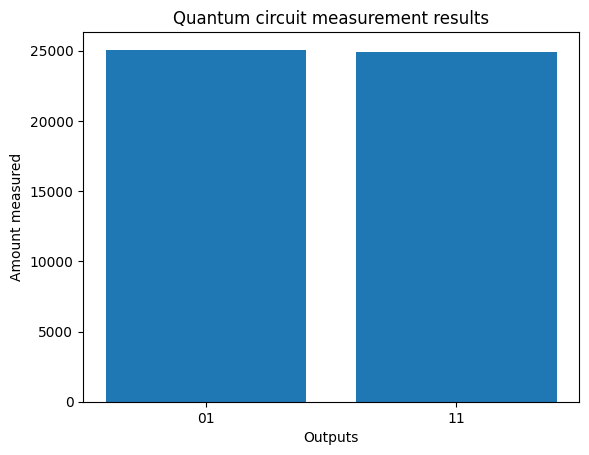

In [ ]:
# Solution

import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(2)
QQ.initialize([0,0,1,0])
QQ.h(0)
QQ.h(1)
QQ.x(0)
QQ.cx(0,1)
QQ.x(0)
QQ.h(0)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()

As is visible, the implemented balanced function will always give $q_{0} = 1$, so we can be sure that it is balanced.

## Question 5

During the lecture: "Basic Quantum Algorithms 2", I  introduced the `Deutsch-Josza algorithm` (an extension to multiple input qubits of the `Deutsch algorithm`). I also identified all the possible constant and balanced functions for 2 qubits inputs. Moreover, I already solved an example for the `XOR` balanced function in the whiteboard.

Now, you have to implement the Deutsch-Josza algorithm for the 2-qubits SET constant function and execute a single-shot simulation. Does your implementation correctly identify the function as constant?

![Question5](img/qci_a7_question5.png)

NB: Remember that the algorithm states that the $\ket{q_{2}}$ register must be initialized to $\ket{1}$.

Statevector([-0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.70710678+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))
     ┌──────────────────────────────┐┌───┐┌───┐
q_0: ┤0                             ├┤ H ├┤ H ├
     │                              │├───┤├───┤
q_1: ┤1 Initialize(0,0,0,0,1,0,0,0) ├┤ H ├┤ H ├
     │                              │├───┤├───┤
q_2: ┤2                             ├┤ H ├┤ X ├
     └──────────────────────────────┘└───┘└───┘
[['100'], [1]]


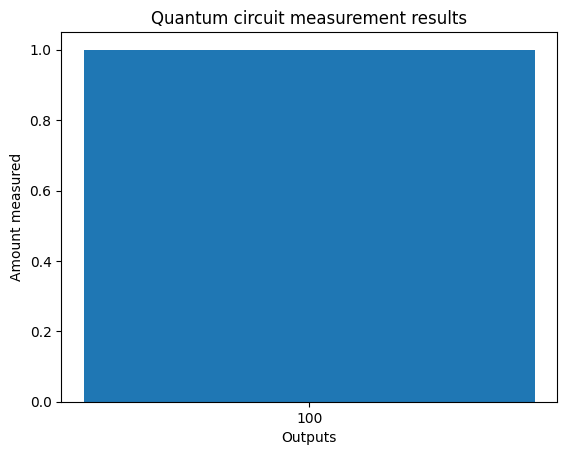

In [ ]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(3)
QQ.initialize([0,0,0,0,1,0,0,0])
QQ.h(0)
QQ.h(1)
QQ.h(2)
QQ.x(2)
QQ.h(0)
QQ.h(1)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 1)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()


So yes, it does identify it as constant. due to both q0 and q1 being 0.

## Question 6

Your previous answer was based on a single-shot simulation, you could have had luck. What about a multi-shot one? Add measurements to registers $\ket{q_{1}}$ and $\ket{q_{0}}$, execute a multi-shot simulation and plot the resulting histogram. Did you get $\ket{00}$ with 100% probability?

Statevector([-0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.70710678+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))
     ┌──────────────────────────────┐┌───┐┌───┐
q_0: ┤0                             ├┤ H ├┤ H ├
     │                              │├───┤├───┤
q_1: ┤1 Initialize(0,0,0,0,1,0,0,0) ├┤ H ├┤ H ├
     │                              │├───┤├───┤
q_2: ┤2                             ├┤ H ├┤ X ├
     └──────────────────────────────┘└───┘└───┘
[['000', '100'], [24988, 25012]]


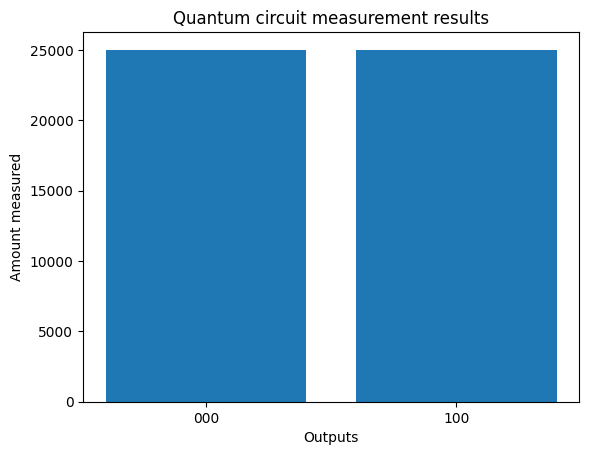

In [ ]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(3)
QQ.initialize([0,0,0,0,1,0,0,0])
QQ.h(0)
QQ.h(1)
QQ.h(2)
QQ.x(2)
QQ.h(0)
QQ.h(1)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()


It isen't luck, just how the `Deutsch-Josza algorithm` work, it will work with one shot (disregarding faults).

## Question 7

During the lecture: "Basic Quantum Algorithms 2", I  introduced the `Deutsch-Josza algorithm` (an extension to multiple input qubits of the `Deutsch algorithm`). I also identified all the possible constant and balanced functions for 2 qubits inputs. Moreover, I already solved an example for the `XOR` balanced function in the whiteboard.

Now, you have to implement the Deutsch-Josza algorithm for the following 2-qubits balanced function and execute a single-shot simulation. Does your implementation correctly identify the function as balanced?

The function you have to implement is:

| $x_{1}$ | $x_{0}$ | Function # 1 | Function # 2 | Function # 3 | Function # 4 | Function # 5 |
| :- | - | - | - | - | - | - |
| 0 | 0 | 1 | 0 | 1 | 0 | 1 |
| 0 | 1 | 0 | 0 | 1 | 1 | 0 |
| 1 | 0 | 0 | 1 | 0 | 0 | 1 |
| 1 | 1 | 1 | 1 | 0 | 1 | 0 |

And the corresponding function is:

| Function | Groups |
| :- | - |
| 1 | 8, 12, 13 |
| 2 | 4, 7, 11 |
| 3 | 1, 9, 10 |
| 4 | 2, 5 |
| 5 | 3, 6 |


NB: Remember that the algorithm states that the $\ket{q_{2}}$ register must be initialized to $\ket{1}$.

Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))
     ┌──────────────────────────────┐┌───┐┌───┐   ┌───┐
q_0: ┤0                             ├┤ H ├┤ X ├─X─┤ H ├
     │                              │├───┤├───┤ │ └───┘
q_1: ┤1 Initialize(0,0,0,0,1,0,0,0) ├┤ H ├┤ H ├─┼──────
     │                              │├───┤└───┘ │      
q_2: ┤2                             ├┤ H ├──────X──────
     └──────────────────────────────┘└───┘             
[['001'], [1]]


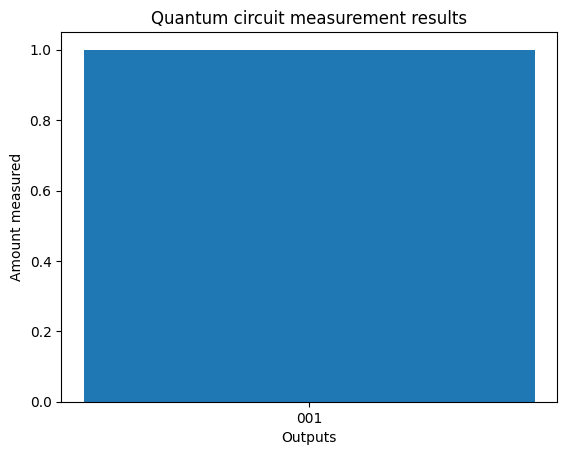

In [16]:
# Solution
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(3)
QQ.initialize([0,0,0,0,1,0,0,0])
QQ.h(0)
QQ.h(1)
QQ.h(2)
QQ.x(0)
QQ.swap(0,2)
QQ.h(0)
QQ.h(1)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 1)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()


Yes, it does identify it as balanced! dont worry btw, i tested the algorithm before, i know that it does what its supposed to do, so as every has said trust me :3

## Question 8

Your previous answer was based on a single-shot simulation, you could have had luck. What about a multi-shot one? Add measurements to registers $\ket{q_{1}}$ and $\ket{q_{0}}$, execute a multi-shot simulation and plot the resulting histogram. Did you get the expected result with 100% probability?

Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))
     ┌──────────────────────────────┐┌───┐┌───┐   ┌───┐
q_0: ┤0                             ├┤ H ├┤ X ├─X─┤ H ├
     │                              │├───┤├───┤ │ └───┘
q_1: ┤1 Initialize(0,0,0,0,1,0,0,0) ├┤ H ├┤ H ├─┼──────
     │                              │├───┤└───┘ │      
q_2: ┤2                             ├┤ H ├──────X──────
     └──────────────────────────────┘└───┘             
[['001', '101'], [24957, 25043]]


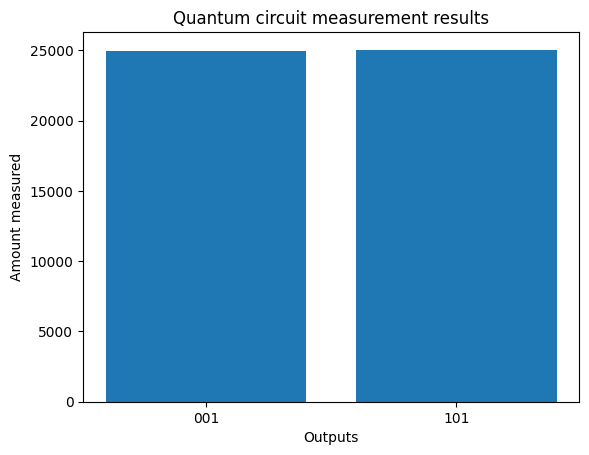

In [21]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(3)
QQ.initialize([0,0,0,0,1,0,0,0])
QQ.h(0)
QQ.h(1)
QQ.h(2)
QQ.x(0)
QQ.swap(0,2)
QQ.h(0)
QQ.h(1)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()


So yes, we get the expected result, it will tell me if it is balanced not because q0 is 1.

## Question 9

During the lesson: "Basic Quantum Algorithms 2", I mentioned that the Bell states can be transformed by manipulating 1 single qubit. We even saw that process using the typical quantum circuit for preparing Bell states (left side of the image). Is it the same if we use a different quantum circuit? Test it by using the alternate circuit (show in the right side of the image). Implement the circuit to show the resulting Bell states.

![Question9](img/qci_a7_question9.png)

Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
     ┌───┐   ┌───┐┌───┐┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├┤ X ├
     ├───┤ │ └───┘└───┘└───┘
q_1: ┤ H ├─■────────────────
     └───┘                  
[['10', '01'], [25047, 24953]]


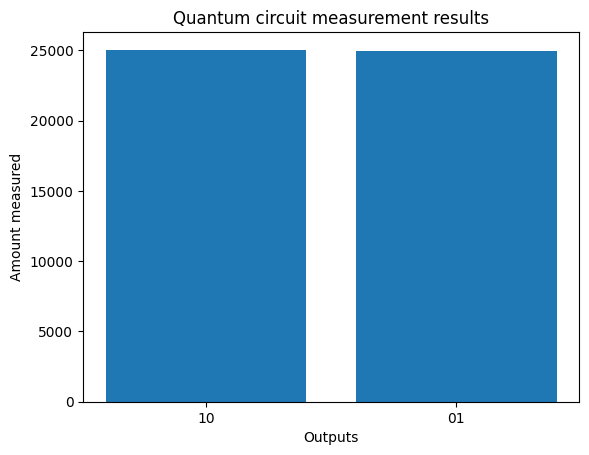

In [28]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(2)
QQ.h(0)
QQ.h(1)
QQ.cz(0,1)
QQ.h(0) #this gives us phi +, lets transform it into psi-

QQ.z(0)
QQ.x(0)

print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show() #and yes, as we can see in the state vector, it works when we manipulate just q0

## Question 10

During the lesson: "Basic Quantum Algorithms 2" I introduced the Superdense Coding algorithm. It allows you to transmit two bits by sending one qubit. Write a program that allows the user to enter the encoded message (0, 1, 2 or 3), implement the quantum circuit for the superdense coding (encoding the message provided by the user) and transmit it. Perform the measurement and show the message encoded by the user.

![Question10](img/qci_a7_question10.png)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
          ┌───┐┌───┐┌───┐┌───┐     
q_0: ─────┤ X ├┤ Z ├┤ X ├┤ X ├─────
     ┌───┐└─┬─┘└───┘└───┘└─┬─┘┌───┐
q_1: ┤ H ├──■──────────────■──┤ H ├
     └───┘                    └───┘
[['11'], [50000]]


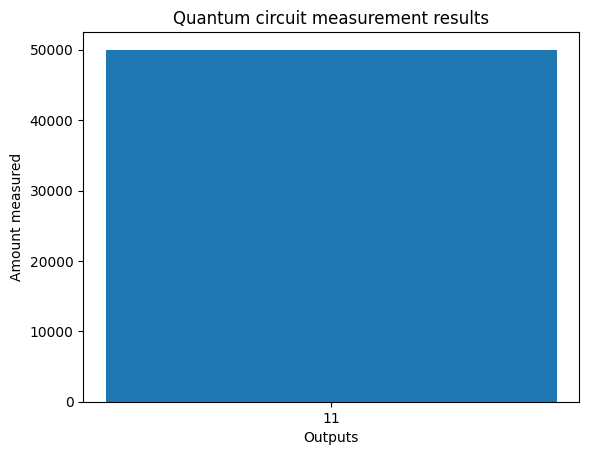

In [35]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

ToEncode = 3 #this is the encoded value. \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

QQ = qiskit.QuantumCircuit(2)
QQ.h(1)
QQ.cx(1,0)
if ToEncode >= 2:
    QQ.z(0)
if ToEncode % 2 > 0:
    QQ.x(0)
QQ.cx(1,0)
QQ.h(1)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()


Eyyy, so it does work, it identifies 3 as 11, so neat, it works!